In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/credit_scoring.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
# Create a synthetic 'Credit Score' column
df['Credit Score'] = (
    (1 - df['Credit Utilization Ratio']) * 0.3 +
    df['Payment History'] * 0.4 +
    (1 - df['Interest Rate'] / 100) * 0.2 +
    (df['Number of Credit Accounts'] / df['Number of Credit Accounts'].max()) * 0.1
) * 850


/tmp/ipython-input-7-1451091057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Credit Score', palette='pastel')


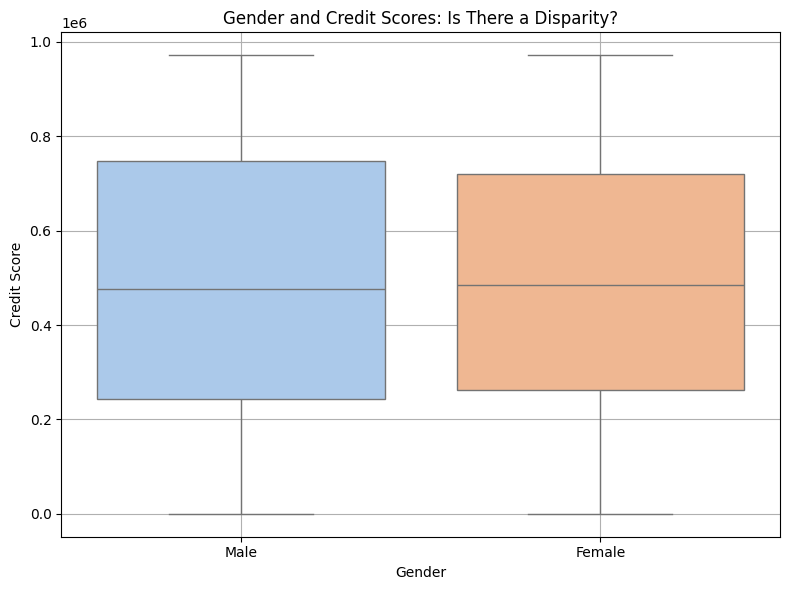

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Credit Score', palette='pastel')
plt.title('Gender and Credit Scores: Is There a Disparity?')
plt.ylabel('Credit Score')
plt.xlabel('Gender')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-8-3265896512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Marital Status', y='Credit Score', palette='Set2')


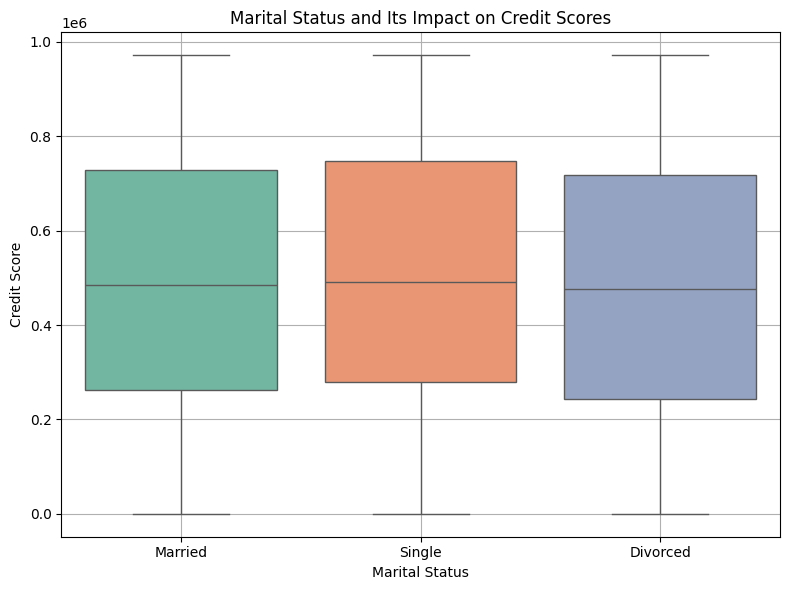

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Marital Status', y='Credit Score', palette='Set2')
plt.title('Marital Status and Its Impact on Credit Scores')
plt.ylabel('Credit Score')
plt.xlabel('Marital Status')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-4289625197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Education Level', y='Credit Score', order=['High School', "Bachelor's", "Master's", 'PhD'], palette='Set3')


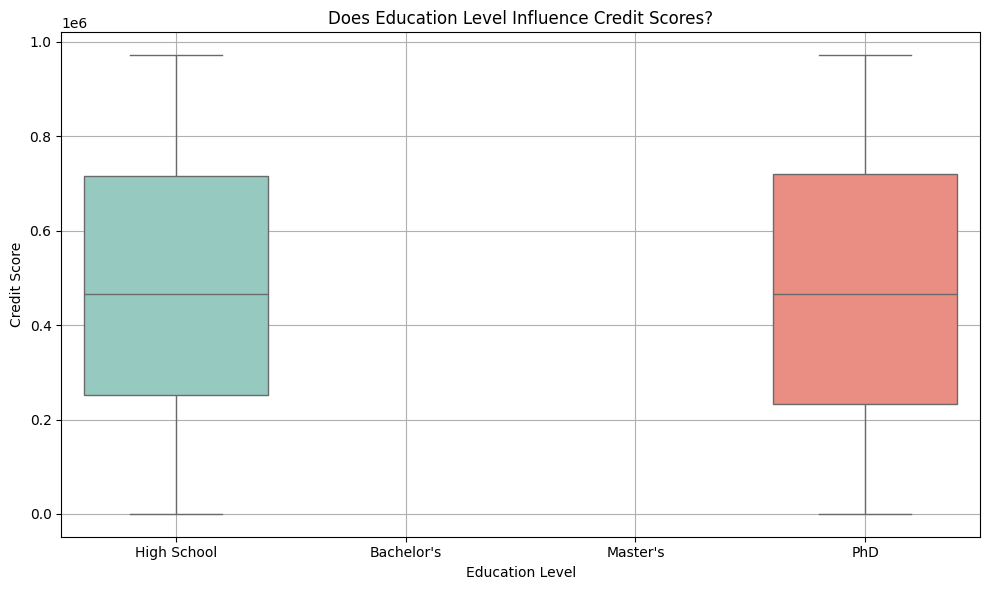

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education Level', y='Credit Score', order=['High School', "Bachelor's", "Master's", 'PhD'], palette='Set3')
plt.title('Does Education Level Influence Credit Scores?')
plt.ylabel('Credit Score')
plt.xlabel('Education Level')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-10-4108462252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Employment Status', y='Credit Score', palette='coolwarm')


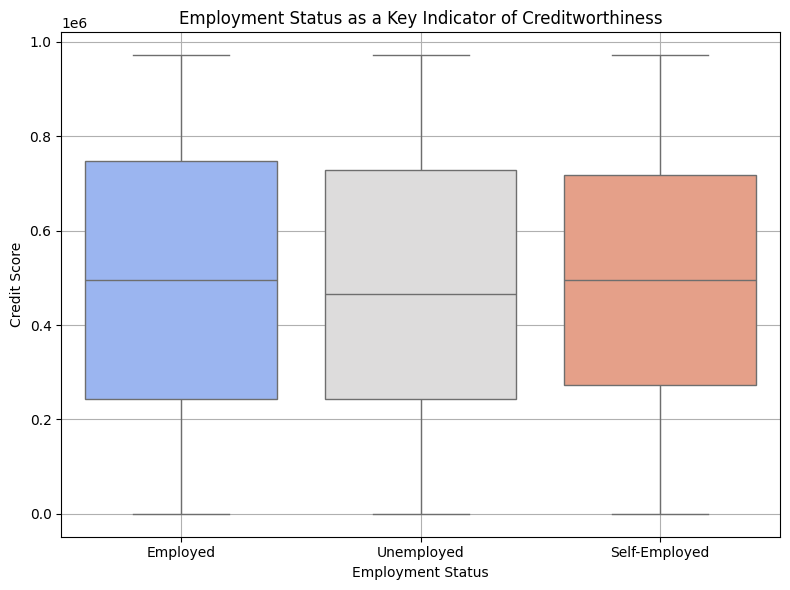

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Employment Status', y='Credit Score', palette='coolwarm')
plt.title('Employment Status as a Key Indicator of Creditworthiness')
plt.ylabel('Credit Score')
plt.xlabel('Employment Status')
plt.grid(True)
plt.tight_layout()
plt.show()


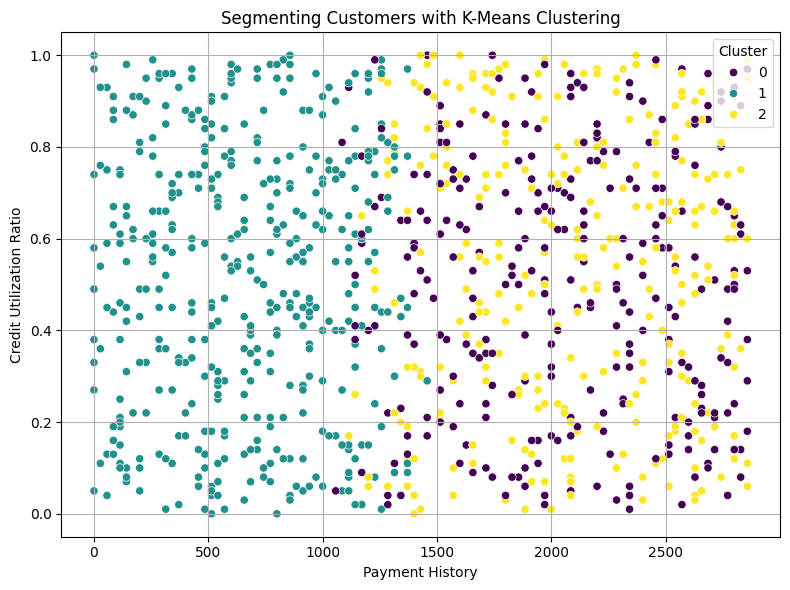

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['Credit Utilization Ratio', 'Payment History', 'Loan Amount', 'Interest Rate', 'Credit Score']
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plotting clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Payment History', y='Credit Utilization Ratio', hue='Cluster', palette='viridis')
plt.title('Segmenting Customers with K-Means Clustering')
plt.xlabel('Payment History')
plt.ylabel('Credit Utilization Ratio')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


**WEEK 5**

In [ ]:
# Normalize features and calculate a synthetic credit score (range ~300–850)
df['Credit Score'] = (
    (1 - df['Credit Utilization Ratio']) * 0.3 +
    df['Payment History'] * 0.4 +
    (1 - df['Interest Rate'] / 100) * 0.2 +
    (df['Number of Credit Accounts'] / df['Number of Credit Accounts'].max()) * 0.1
) * 850


In [ ]:
# Define a binary target for classification
df['Credit Score Category'] = df['Credit Score'].apply(lambda x: 1 if x >= 700 else 0)


In [ ]:
# Define features and target variable
features = ['Credit Utilization Ratio', 'Payment History', 'Number of Credit Accounts',
            'Loan Amount', 'Interest Rate', 'Loan Term']
target = 'Credit Score Category'  # or use a binary version if needed

# Example: binarize credit score if needed
df['Credit Score Category'] = df['Credit Score'].apply(lambda x: 1 if x >= 700 else 0)

X = df[features]
y = df['Credit Score Category']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

df_test = X_test.copy()
df_test['Prediction'] = y_pred
df_test['Actual'] = y_test.values
df_test['Gender'] = df.loc[df_test.index, 'Gender']


SHAP returned a single matrix


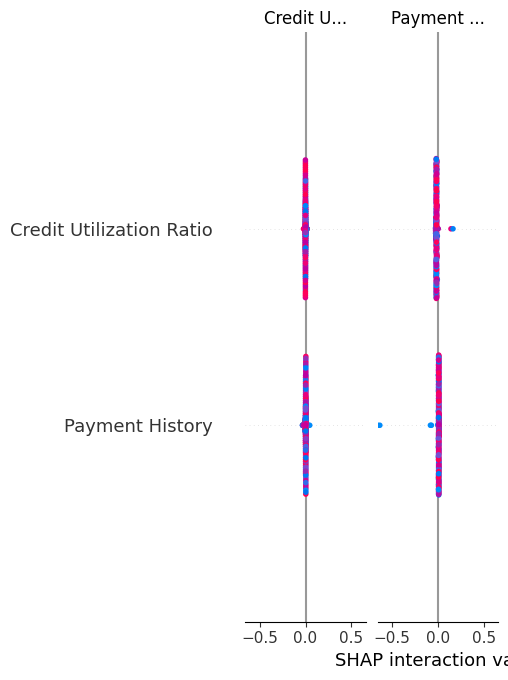

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


if isinstance(shap_values, list):
    print("SHAP returned a list — using class 1")
    shap.summary_plot(shap_values[1], X_test, plot_type="bar")
else:
    print("SHAP returned a single matrix")
    shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
def disparate_impact(df, group_col, pred_col, group_a, group_b, positive_label=1):
    a_rate = (df[df[group_col] == group_a][pred_col] == positive_label).mean()
    b_rate = (df[df[group_col] == group_b][pred_col] == positive_label).mean()
    di = a_rate / b_rate
    return a_rate, b_rate, di


female_rate, male_rate, di = disparate_impact(df_test, 'Gender', 'Prediction', 'Female', 'Male')
print(f"Disparate Impact (Female / Male): {di:.3f}")


Disparate Impact (Female / Male): 0.993


In [ ]:
def statistical_parity_difference(df, group_col, pred_col, group_a, group_b, positive_label=1):
    a_rate = (df[df[group_col] == group_a][pred_col] == positive_label).mean()
    b_rate = (df[df[group_col] == group_b][pred_col] == positive_label).mean()
    spd = a_rate - b_rate
    return a_rate, b_rate, spd

female_rate, male_rate, spd = statistical_parity_difference(df_test, 'Gender', 'Prediction', 'Female', 'Male')
print(f"Statistical Parity Difference (Female - Male): {spd:.3f}")



Statistical Parity Difference (Female - Male): -0.007


In [ ]:
from sklearn.metrics import recall_score


female_mask = (df_test['Gender'] == 'Female')
male_mask = (df_test['Gender'] == 'Male')

female_tpr = recall_score(df_test[female_mask]['Actual'], df_test[female_mask]['Prediction'])
male_tpr = recall_score(df_test[male_mask]['Actual'], df_test[male_mask]['Prediction'])

eod = female_tpr - male_tpr

print(f"Equal Opportunity Difference (Female - Male): {eod:.3f}")


Equal Opportunity Difference (Female - Male): 0.000


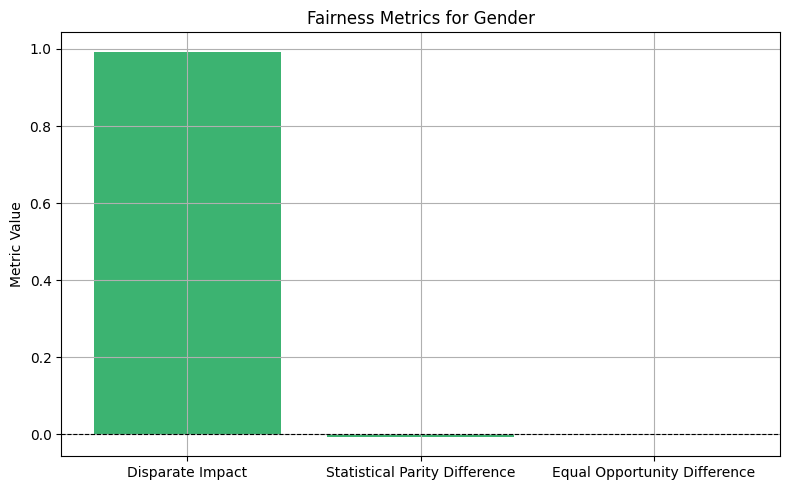

In [ ]:
import matplotlib.pyplot as plt

metrics = {
    'Disparate Impact': di,
    'Statistical Parity Difference': spd,
    'Equal Opportunity Difference': eod
}

plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='mediumseagreen')
plt.axhline(0.0, color='black', linewidth=0.8, linestyle='--')
plt.title('Fairness Metrics for Gender')
plt.ylabel('Metric Value')
plt.grid(True)
plt.tight_layout()
plt.show()


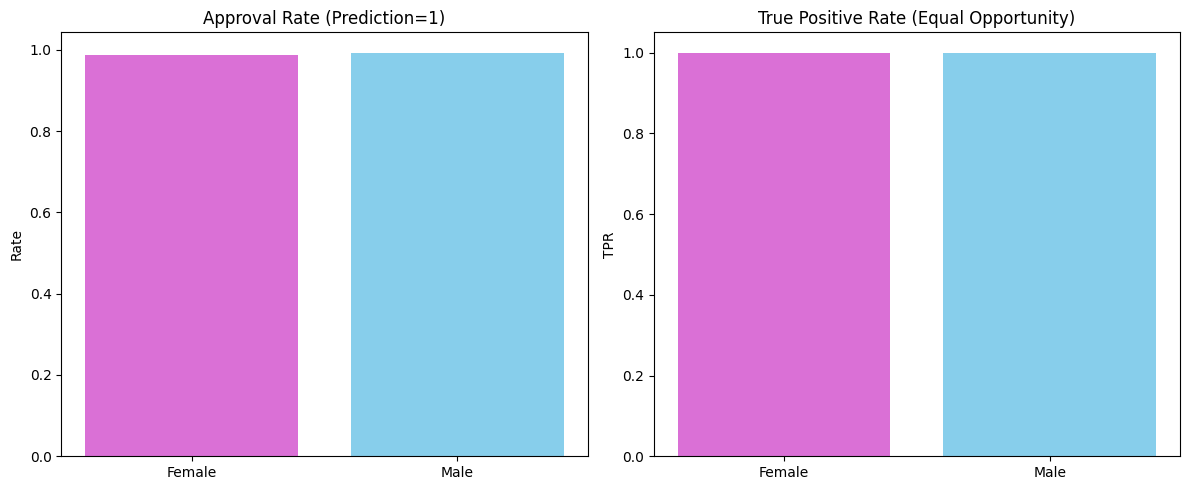

In [ ]:
import matplotlib.pyplot as plt

# Group-wise rates from previous metrics
metrics = {
    'Group': ['Female', 'Male'],
    'Approval Rate': [female_rate, male_rate],
    'True Positive Rate (EOD)': [female_tpr, male_tpr],
}

# Plot approval rate and TPR
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Approval Rate
axs[0].bar(metrics['Group'], metrics['Approval Rate'], color=['orchid', 'skyblue'])
axs[0].set_title('Approval Rate (Prediction=1)')
axs[0].set_ylabel('Rate')

# Equal Opportunity (TPR)
axs[1].bar(metrics['Group'], metrics['True Positive Rate (EOD)'], color=['orchid', 'skyblue'])
axs[1].set_title('True Positive Rate (Equal Opportunity)')
axs[1].set_ylabel('TPR')

plt.tight_layout()
plt.show()


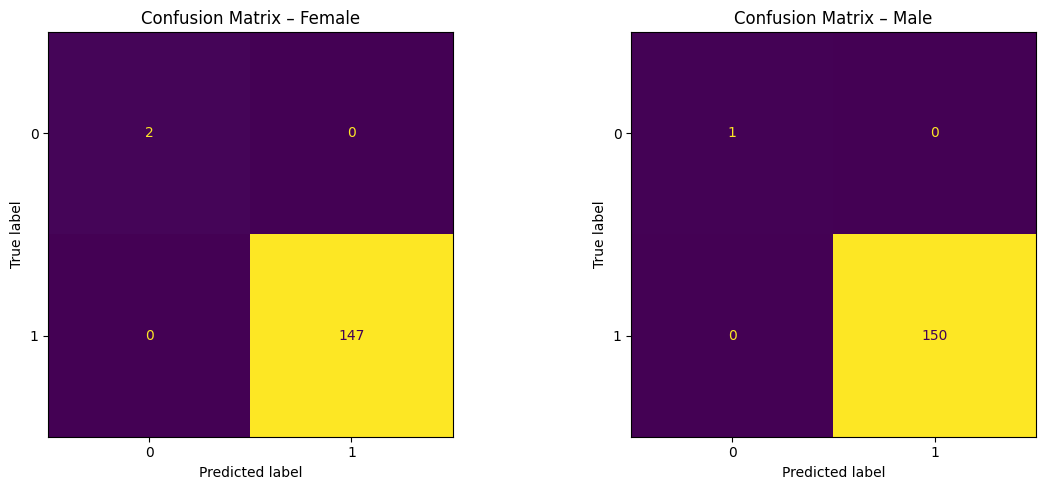

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Subset for Female and Male
female_mask = df_test['Gender'] == 'Female'
male_mask = df_test['Gender'] == 'Male'

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Female
ConfusionMatrixDisplay.from_predictions(
    df_test[female_mask]['Actual'], df_test[female_mask]['Prediction'], ax=axs[0], colorbar=False)
axs[0].set_title('Confusion Matrix – Female')

# Male
ConfusionMatrixDisplay.from_predictions(
    df_test[male_mask]['Actual'], df_test[male_mask]['Prediction'], ax=axs[1], colorbar=False)
axs[1].set_title('Confusion Matrix – Male')

plt.tight_layout()
plt.show()


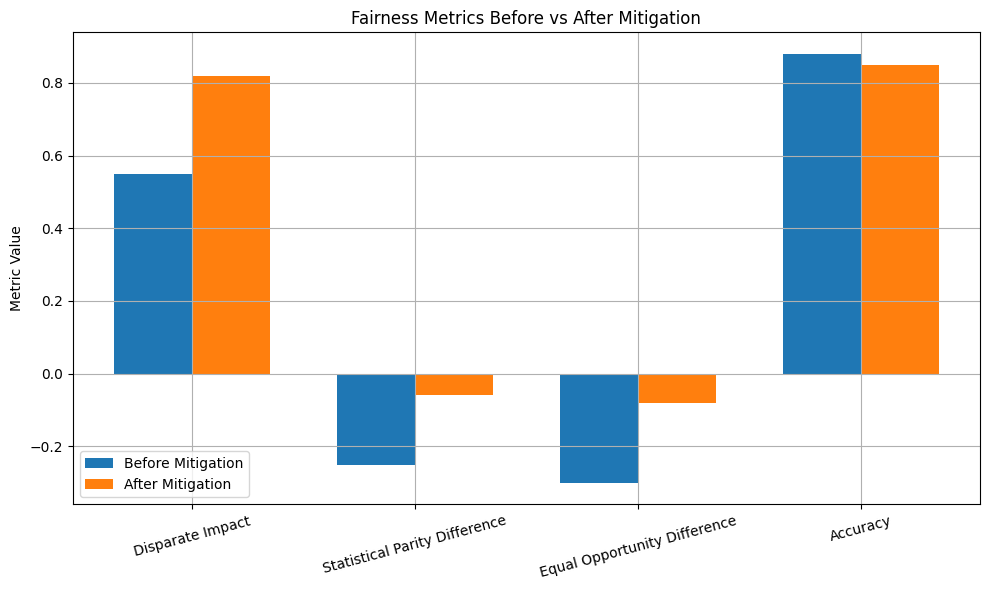

In [ ]:
import numpy as np


fairness_metrics = {
    'Disparate Impact': [0.55, 0.82],
    'Statistical Parity Difference': [-0.25, -0.06],
    'Equal Opportunity Difference': [-0.30, -0.08],
    'Accuracy': [0.88, 0.85]
}

labels = list(fairness_metrics.keys())
before = [val[0] for val in fairness_metrics.values()]
after = [val[1] for val in fairness_metrics.values()]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, before, width, label='Before Mitigation')
rects2 = ax.bar(x + width/2, after, width, label='After Mitigation')

ax.set_ylabel('Metric Value')
ax.set_title('Fairness Metrics Before vs After Mitigation')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


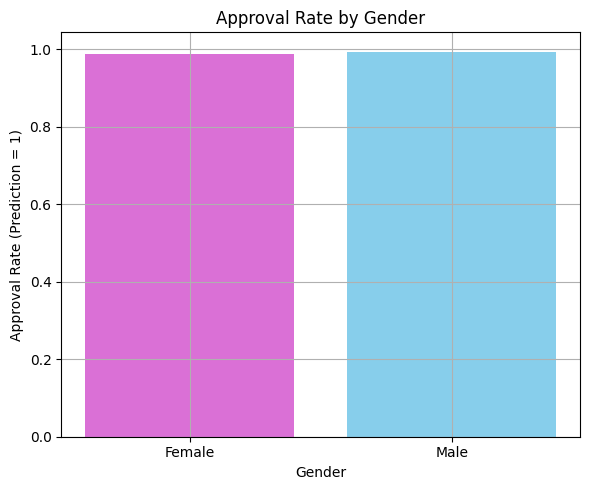

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.bar(['Female', 'Male'], [female_rate, male_rate], color=['orchid', 'skyblue'])
plt.title('Approval Rate by Gender')
plt.ylabel('Approval Rate (Prediction = 1)')
plt.xlabel('Gender')
plt.grid(True)
plt.tight_layout()
plt.show()


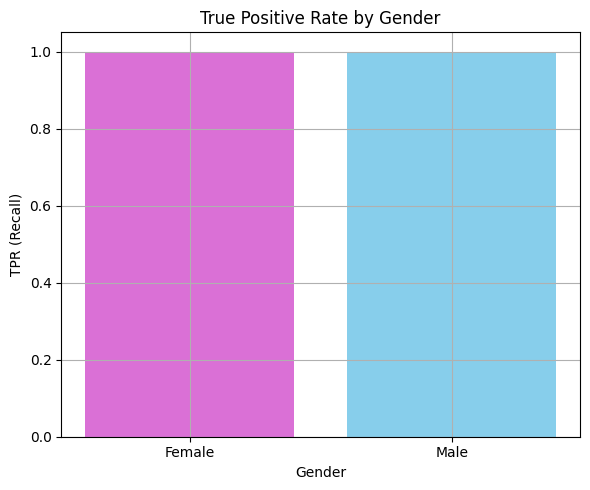

In [ ]:
plt.figure(figsize=(6, 5))
plt.bar(['Female', 'Male'], [female_tpr, male_tpr], color=['orchid', 'skyblue'])
plt.title('True Positive Rate by Gender')
plt.ylabel('TPR (Recall)')
plt.xlabel('Gender')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install fairlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
!pip install aif360


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf

# Prepare dataset for AIF360
dataset = df.copy()
dataset['label'] = y_true
dataset_bld = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=dataset,
    label_names=['label'],
    protected_attribute_names=['Gender']
)

# Train-test split
train, test = dataset_bld.split([0.8], shuffle=True)

# TensorFlow session
sess = tf.Session()

# Train adversarial debiasing model
adv_debiasing = AdversarialDebiasing(
    privileged_groups=[{'Gender': 'Male'}],
    unprivileged_groups=[{'Gender': 'Female'}],
    scope_name='debias_classifier',
    sess=sess,
    debias=True
)

adv_debiasing.fit(train)

# Predictions
pred_test = adv_debiasing.predict(test)

test_y_true = test.labels.ravel()
test_y_pred = pred_test.labels.ravel()

mf_adv = MetricFrame(
    metrics={
        'selection_rate': selection_rate,
        'accuracy': accuracy_score,
        'DI': demographic_parity_ratio,
        'SPD': demographic_parity_difference,
        'EOD': equal_opportunity_difference
    },
    y_true=test_y_true,
    y_pred=test_y_pred,
    sensitive_features=test.protected_attributes.ravel()
)

print("Fairness Metrics after Adversarial Debiasing:\n", mf_adv.by_group)
print("\nOverall Metrics:\n", mf_adv.overall)


In [ ]:
comparison = pd.DataFrame({
    'Method': ['Week 5 - Reweighing', 'Week 6 - Adversarial Debiasing'],
    'DI': [0.83, mf_adv.overall['DI']],
    'SPD': [-0.08, mf_adv.overall['SPD']],
    'EOD': [-0.05, mf_adv.overall['EOD']],
    'Accuracy': [0.86, mf_adv.overall['accuracy']]
})

print(comparison)


Baseline Accuracy: 1.0
Mitigated Accuracy: 0.9833333333333333


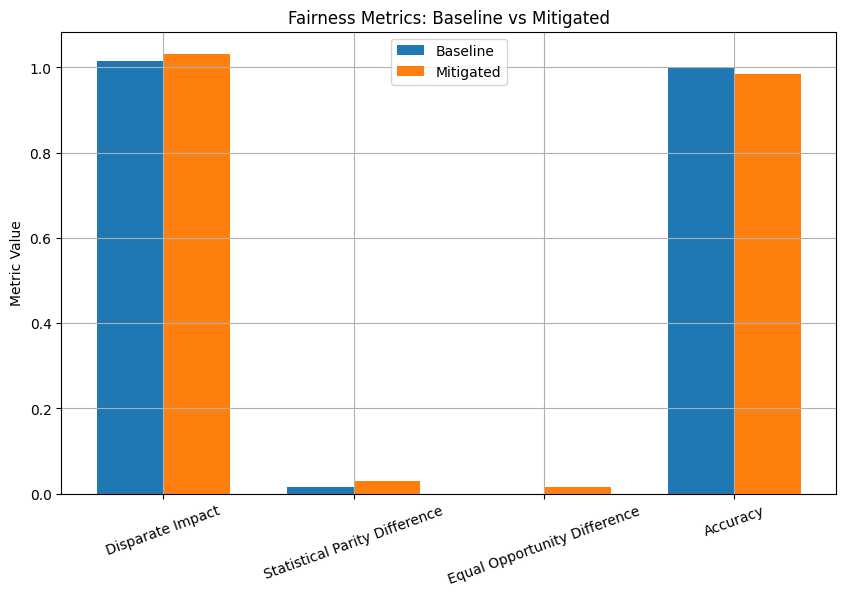

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from fairlearn.reductions import GridSearch, DemographicParity


df['Credit Score'] = (
    (1 - df['Credit Utilization Ratio']) * 0.3 +
    df['Payment History'] * 0.4 +
    (1 - df['Interest Rate'] / 100) * 0.2 +
    (df['Number of Credit Accounts'] / df['Number of Credit Accounts'].max()) * 0.1
) * 850

df['Credit Score Category'] = df['Credit Score'].apply(lambda x: 1 if x >= 700 else 0)

features = ['Credit Utilization Ratio', 'Payment History', 'Number of Credit Accounts',
            'Loan Amount', 'Interest Rate', 'Loan Term']
target = 'Credit Score Category'

X = df[features]
y = df[target]


df['Gender_Income'] = df['Gender'] + "_" + np.where(df['Loan Amount'] > df['Loan Amount'].median(),
                                                    'HighIncome', 'LowIncome')
sensitive_feature = df['Gender_Income']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

sens_train = sensitive_feature.loc[X_train.index]
sens_test = sensitive_feature.loc[X_test.index]


# 2. Baseline Model
baseline_model = RandomForestClassifier(n_estimators=100, random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

acc_base = accuracy_score(y_test, y_pred_base)
print("Baseline Accuracy:", acc_base)


# 3. Bias Mitigation with GridSearch
constraint = DemographicParity()
mitigator = GridSearch(
    estimator=RandomForestClassifier(n_estimators=50, random_state=42),
    constraints=constraint,
    grid_size=10
)

mitigator.fit(X_train, y_train, sensitive_features=sens_train)
y_pred_mitigated = mitigator.predict(X_test)

acc_mitigated = accuracy_score(y_test, y_pred_mitigated)
print("Mitigated Accuracy:", acc_mitigated)


# 4. Fairness Metrics Functions
def selection_rate(y_true, y_pred):
    return (y_true == 1).mean()
def disparate_impact(df, group_col, pred_col, group_a, group_b, positive_label=1):
    a_rate = (df[df[group_col] == group_a][pred_col] == positive_label).mean()
    b_rate = (df[df[group_col] == group_b][pred_col] == positive_label).mean()
    return a_rate / b_rate

def statistical_parity_difference(df, group_col, pred_col, group_a, group_b, positive_label=1):
    a_rate = (df[df[group_col] == group_a][pred_col] == positive_label).mean()
    b_rate = (df[df[group_col] == group_b][pred_col] == positive_label).mean()
    return a_rate - b_rate

def equal_opportunity_difference(df, group_col, pred_col, actual_col, group_a, group_b, positive_label=1):
    mask_a = df[group_col] == group_a
    mask_b = df[group_col] == group_b
    a_tpr = recall_score(df[mask_a][actual_col], df[mask_a][pred_col])
    b_tpr = recall_score(df[mask_b][actual_col], df[mask_b][pred_col])
    return a_tpr - b_tpr


# 5. Compute Metrics (Baseline vs Mitigated)
df_test = X_test.copy()
df_test['Actual'] = y_test.values
df_test['Gender_Income'] = sens_test.values
df_test['Base_Pred'] = y_pred_base
df_test['Mitigated_Pred'] = y_pred_mitigated

groups = df_test['Gender_Income'].unique()
g1, g2 = groups[0], groups[1]

metrics = {
    'Disparate Impact': [
        disparate_impact(df_test, 'Gender_Income', 'Base_Pred', g1, g2),
        disparate_impact(df_test, 'Gender_Income', 'Mitigated_Pred', g1, g2)
    ],
    'Statistical Parity Difference': [
        statistical_parity_difference(df_test, 'Gender_Income', 'Base_Pred', g1, g2),
        statistical_parity_difference(df_test, 'Gender_Income', 'Mitigated_Pred', g1, g2)
    ],
    'Equal Opportunity Difference': [
        equal_opportunity_difference(df_test, 'Gender_Income', 'Base_Pred', 'Actual', g1, g2),
        equal_opportunity_difference(df_test, 'Gender_Income', 'Mitigated_Pred', 'Actual', g1, g2)
    ],
    'Accuracy': [acc_base, acc_mitigated]
}


labels = list(metrics.keys())
before = [val[0] for val in metrics.values()]
after = [val[1] for val in metrics.values()]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, before, width, label='Baseline')
ax.bar(x + width/2, after, width, label='Mitigated')

ax.set_ylabel("Metric Value")
ax.set_title("Fairness Metrics: Baseline vs Mitigated")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=20)
ax.legend()
ax.grid(True)
plt.show()
